In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('whitegrid')

In [2]:
df=pd.read_csv('telecom_churn_data.csv')
df.columns=['State','Account Length','Area Code','Phone','International Plan','VMail Plan','VMail Message','Day Mins','Day Calls','Day Charge','Eve Mins','Eve Calls','Eve Charge','Night Mins','Night Calls','Night Charge','International Mins','International calls','International Charge','CustServ Calls','Churn']
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4616 entries, 0 to 4615
Data columns (total 21 columns):
State                   4616 non-null object
Account Length          4616 non-null int64
Area Code               4616 non-null int64
Phone                   4616 non-null object
International Plan      4616 non-null object
VMail Plan              4616 non-null object
VMail Message           4616 non-null int64
Day Mins                4616 non-null float64
Day Calls               4616 non-null int64
Day Charge              4616 non-null float64
Eve Mins                4616 non-null float64
Eve Calls               4616 non-null int64
Eve Charge              4616 non-null float64
Night Mins              4616 non-null float64
Night Calls             4616 non-null int64
Night Charge            4616 non-null float64
International Mins      4616 non-null float64
International calls     4616 non-null int64
International Charge    4616 non-null float64
CustServ Calls          4616 non-null

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
0,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
1,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
2,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
3,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
4,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.


In [3]:
df.drop(['Account Length','Phone'],axis=1,inplace=True)
x=df.drop(['State','Area Code','International Plan','VMail Plan','Churn'],axis=1)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x=pd.DataFrame(x,columns=['VMail Message','Day Mins','Day Calls','Day Charge','Eve Mins','Eve Calls','Eve Charge','Night Mins','Night Calls','Night Charge','International Mins','International Calls','International Charge','CustServ Calls'])
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
var_mod = ['State','Area Code','International Plan','VMail Plan']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
for i in var_mod:
    x[i]=df[i]
y=df['Churn']

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [5]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(100)

Text(0.5, 0, 'Relative Importance')

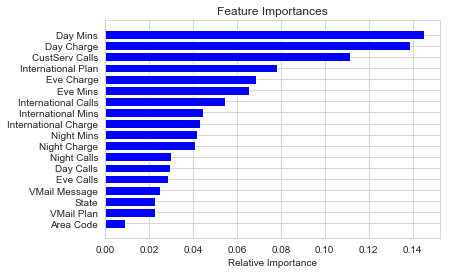

In [6]:
rfc.fit(x_train,y_train)
features=x.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [7]:
predictions=rfc.predict(x_test)

In [8]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

      False.       0.96      0.99      0.98       782
       True.       0.97      0.80      0.87       142

   micro avg       0.96      0.96      0.96       924
   macro avg       0.96      0.90      0.93       924
weighted avg       0.96      0.96      0.96       924

[[778   4]
 [ 29 113]]
0.9642857142857143
